In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [3]:
 batch_size = 100
 learning_rate = 0.0002
 num_epoch = 1

In [4]:
mnist_train = dset.MNIST("/content/drive/MyDrive", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("/content/drive/MyDrive", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [5]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [6]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1),
        nn.ReLU()
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(batch_size, -1)
    return out

encoder = Encoder().cuda()

In [8]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64,16,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16,1,3,2,1,1),
        nn.ReLU()
    )

  def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out

decoder = Decoder().cuda()

In [17]:
parameters = list(encoder.parameters()) + list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [24]:
try:
  encoder, decoder = torch.load('./model/conv_autoencoder.pkl')
  print("\n----------model restored----------\n")
except:
  print("\n----------model not restored----------\n")
  pass

for i in range(num_epoch):
  for j,[image,label] in enumerate(train_loader):
    optimizer.zero_grad()

    image = image.cuda()
    output = encoder(image)
    output = decoder(output)
    loss = loss_func(output,image)

    loss.backward()
    optimizer.step()

    if j % 10 == 0:
      torch.save([encoder,decoder], './model/conv_autoencoder.pkl')
      print(loss)


----------model not restored----------

tensor(0.0047, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0046, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0047, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0053, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0046, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0047, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0045, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0041, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0043, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0041, 

torch.Size([100, 28, 28])


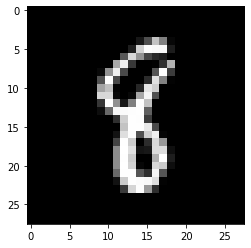

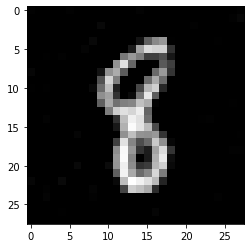

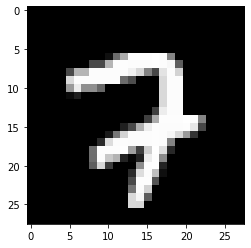

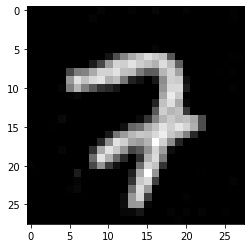

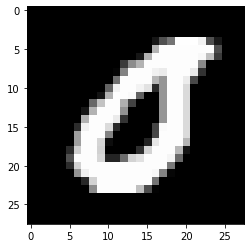

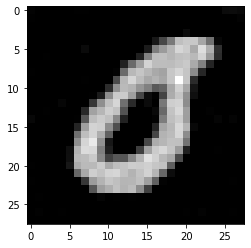

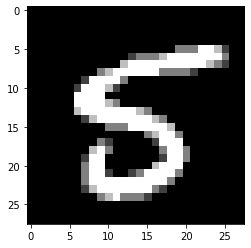

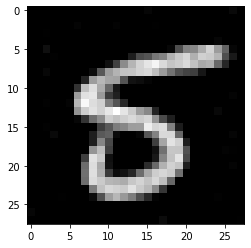

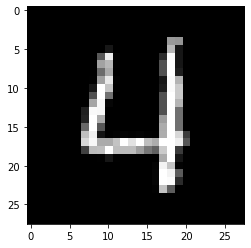

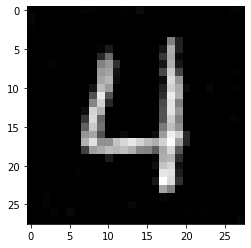

In [26]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [27]:
for i in range(1):
  for j,[image,label] in enumerate(test_loader):
    image = image.cuda()
    output = encoder(image)
    output = decoder(output)

    if j % 10 == 0:
      print(loss)

tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)


torch.Size([100, 28, 28])


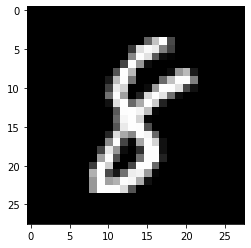

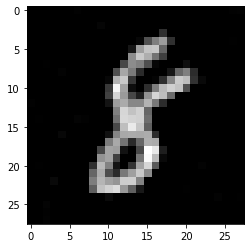

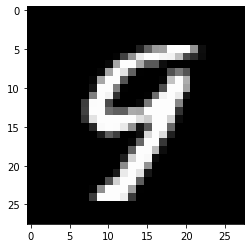

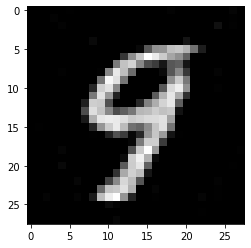

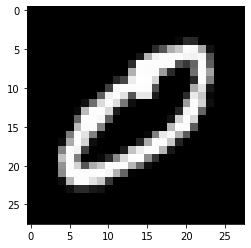

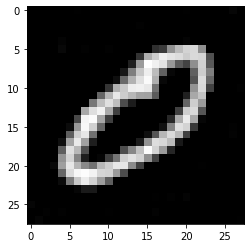

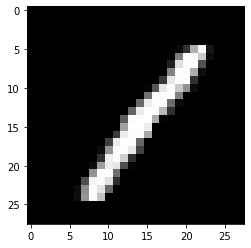

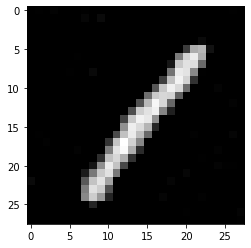

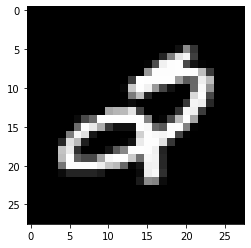

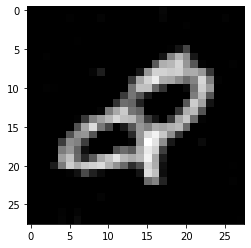

In [29]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()